# Google Analytics Customer Conversion Analysis
**Objective:** Analyze user behavior and conversion patterns using Google Analytics sample data. Identify insights to improve marketing and product strategies.


In [ ]:
# Step 1: Import Libraries
import pandas as pd       
import numpy as np        
import matplotlib.pyplot as plt  
import seaborn as sns    


sns.set(style="whitegrid")


In [ ]:
import pandas as pd

df = pd.read_csv("data/ga_sample.csv")
df.head()


C:\Users\swara\AppData\Local\Temp\ipykernel_22464\2537449647.py:3: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("data/ga_sample.csv")


,channelGrouping,date,device,fullVisitorId,geoNetwork,sessionId,socialEngagementType,totals,trafficSource,visitId,visitNumber,visitStartTime
0,Organic Search,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",1131660440785968503,"{""continent"": ""Asia"", ""subContinent"": ""Western...",1131660440785968503_1472830385,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472830385,1,1472830385
1,Organic Search,20160902,"{""browser"": ""Firefox"", ""browserVersion"": ""not ...",377306020877927890,"{""continent"": ""Oceania"", ""subContinent"": ""Aust...",377306020877927890_1472880147,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472880147,1,1472880147
2,Organic Search,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",3895546263509774583,"{""continent"": ""Europe"", ""subContinent"": ""South...",3895546263509774583_1472865386,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472865386,1,1472865386
3,Organic Search,20160902,"{""browser"": ""UC Browser"", ""browserVersion"": ""n...",4763447161404445595,"{""continent"": ""Asia"", ""subContinent"": ""Southea...",4763447161404445595_1472881213,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472881213,1,1472881213
4,Organic Search,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",27294437909732085,"{""continent"": ""Europe"", ""subContinent"": ""North...",27294437909732085_1472822600,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472822600,2,1472822600


In [ ]:
import json


df['device'] = df['device'].apply(json.loads)
df['geoNetwork'] = df['geoNetwork'].apply(json.loads)
df['totals'] = df['totals'].apply(json.loads)
df['trafficSource'] = df['trafficSource'].apply(json.loads)


df['browser'] = df['device'].apply(lambda x: x.get('browser'))
df['country'] = df['geoNetwork'].apply(lambda x: x.get('country'))
df['pageviews'] = df['totals'].apply(lambda x: int(x.get('pageviews', 0)))  
df['revenue'] = df['totals'].apply(lambda x: int(x.get('transactionRevenue', 0)))  


df['converted'] = df['revenue'].apply(lambda x: 1 if x > 0 else 0)


df_clean = df[['channelGrouping', 'date', 'browser', 'country', 'pageviews', 'revenue', 'converted']]

df_clean.head()


,channelGrouping,date,browser,country,pageviews,revenue,converted
0,Organic Search,20160902,Chrome,Turkey,1,0,0
1,Organic Search,20160902,Firefox,Australia,1,0,0
2,Organic Search,20160902,Chrome,Spain,1,0,0
3,Organic Search,20160902,UC Browser,Indonesia,1,0,0
4,Organic Search,20160902,Chrome,United Kingdom,1,0,0


In [ ]:
print(df['converted'].value_counts())


converted
0    892138
1     11515
Name: count, dtype: int64


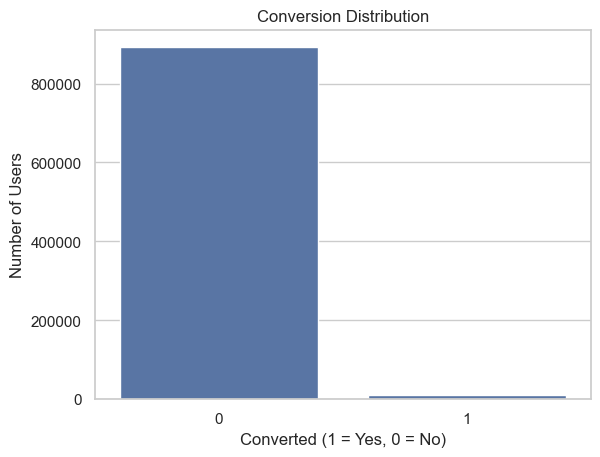

In [ ]:
sns.countplot(x='converted', data=df)
plt.title("Conversion Distribution")
plt.xlabel("Converted (1 = Yes, 0 = No)")
plt.ylabel("Number of Users")
plt.show()


 Insights
- Most users did not convert (0), while fewer users converted (1).
- Suggests we need to improve marketing or website experience.
- Helps decide next steps for deeper analysis.











 Machine Learning – Conversion Prediction

We train a classification model to predict whether a user will convert
based on behavioral features such as sessions, pageviews, and time on site.


In [16]:
print(df.columns)


Index(['channelGrouping', 'date', 'device', 'fullVisitorId', 'geoNetwork',
       'sessionId', 'socialEngagementType', 'totals', 'trafficSource',
       'visitId', 'visitNumber', 'visitStartTime', 'pageviews', 'revenue'],
      dtype='object')


In [ ]:
import json


example = json.loads(df['totals'][0])
print(example.keys())
